In [43]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

%matplotlib inline

In [44]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [45]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [46]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler ()

normalized_data = scaler.fit_transform ( market_data_df )

In [49]:
# Create a DataFrame with the scaled data
normalized_df = pd.DataFrame ( normalized_data, columns=market_data_df.columns )

# Copy the crypto names from the original data
normalized_df['coin_id'] = market_data_df.index

# Set the coinid column as index
normalized_df.set_index ( 'coin_id', inplace=True )

# Display sample data
display ( normalized_df.head () )

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


### Find the Best Value for k Using the Original Scaled DataFrame.

In [88]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values = list( range ( 1, 11 ) )

# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using the scaled DataFrame
# 3. Append the model.inertia_ to the inertia list
for k in k_values:
    model = KMeans ( n_clusters=k, n_init='auto', random_state=2 )
    model.fit ( normalized_df )
    inertia_values.append ( model.inertia_ )

# Create a dictionary with the data to plot the Elbow curve
inertia_dict = { k: inertia for k, inertia in zip(k_values, inertia_values) }

# Create a DataFrame with the data to plot the Elbow curve
inertia_df = pd.DataFrame ( list ( inertia_dict.items () ), columns=['k', 'inertia'] )

# Display the DataFrame
display ( inertia_df )

,k,inertia
0,1,287.000000
1,2,198.571818
2,3,145.635748
3,4,79.022435
4,5,66.217780
5,6,55.763391
6,7,44.237520
7,8,41.068743
8,9,36.933822
9,10,29.836181


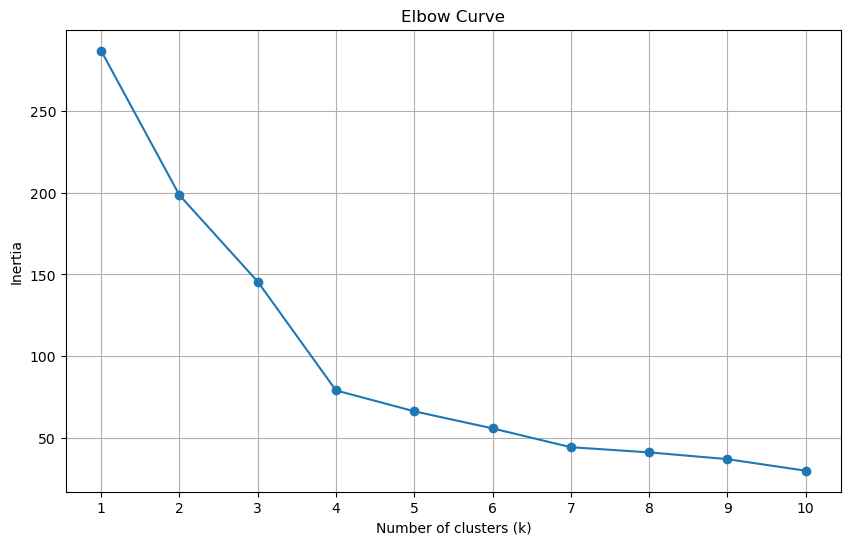

In [89]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.figure ( figsize=(10, 6) )
plt.plot ( inertia_df['k'], inertia_df['inertia'], marker='o' )
plt.xlabel ( 'Number of clusters (k)' )
plt.ylabel ( 'Inertia' )
plt.title ( 'Elbow Curve' )
plt.xticks ( inertia_df['k'] )
plt.grid ( True )
plt.show ()

#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:** The most noticeable bend occurs around `k = 4`. Beyond this point, the decrease in inertia becomes less pronounced.

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [90]:
# Initialize the K-Means model using the best value for k
best_k = 4

kmeans_model = KMeans ( n_clusters=best_k, random_state=42 )

In [91]:
# Fit the K-Means model using the scaled data
kmeans_model.fit ( normalized_data )

KMeans(n_clusters=4, random_state=42)

In [92]:
# Predict the clusters to group the cryptocurrencies using the scaled data
clusters = kmeans_model.predict ( normalized_data )

# View the resulting array of cluster values.
print ( clusters )

[0 0 2 2 0 0 0 0 0 2 2 2 2 0 2 0 2 2 0 2 2 0 2 2 2 2 2 2 0 2 2 2 3 0 2 2 1
 2 2 2 2]


In [93]:
# Create a copy of the DataFrame
copied_df = normalized_df.copy ()

In [94]:
# Add a new column to the DataFrame with the predicted clusters
copied_df['crypto_cluster'] = clusters

# Display sample data
display ( copied_df.head () )

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,crypto_cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,0
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,0
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,2
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,2
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,0


<Axes: xlabel='price_change_percentage_24h', ylabel='price_change_percentage_7d'>

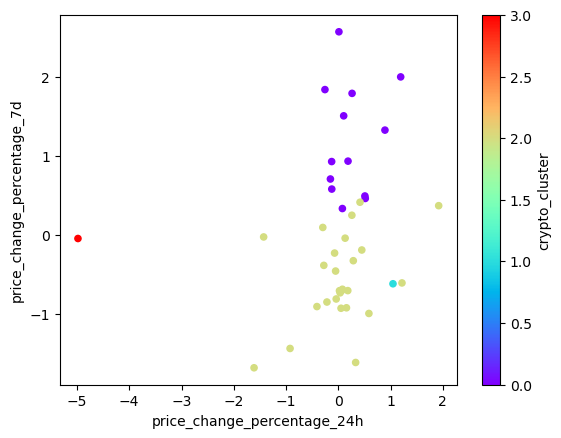

In [77]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.
copied_df.plot.scatter (
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    c="crypto_cluster",
    colormap="rainbow"
)

### Optimize Clusters with Principal Component Analysis.

In [78]:
# Create a PCA model instance and set `n_components=3`.
pca_model = PCA ( n_components=3 )

In [81]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
pca_data = pca_model.fit_transform ( normalized_data )

# View the first five rows of the DataFrame. 
pca_data[:5]

array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527]])

In [82]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
explained_variance_ratio = pca_model.explained_variance_ratio_

explained_variance_ratio

array([0.3719856 , 0.34700813, 0.17603793])

In [85]:
total_explained_variance = explained_variance_ratio.sum ()
print ( f"\nTotal Explained Variance by the 3 principal components: {total_explained_variance:.4f}" )


Total Explained Variance by the 3 principal components: 0.8950


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** Total Explained Variance by the 3 principal components: 0.8950

In [100]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you

# Creating a DataFrame with the PCA data
pca_df = pd.DataFrame ( pca_data, columns=['PCA1', 'PCA2', 'PC3A'], index=market_data_df.index )

# Copy the crypto names from the original data
pca_df['coin_id'] = market_data_df.index

# Set the coinid column as index
pca_df.set_index ( 'coin_id', inplace=True )

# Display sample data
pca_df.head ( 10 )

,PCA1,PCA2,PC3A
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715
binancecoin,-0.516534,1.388377,0.804071
chainlink,-0.450711,0.517699,2.846143
cardano,-0.345600,0.729439,1.478013
litecoin,-0.649468,0.432165,0.600303


### Find the Best Value for k Using the PCA Data

In [101]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values = range ( 1, 11 )

# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using PCA DataFrame.
# 3. Append the model.inertia_ to the inertia list
for k in k_values:
    model = KMeans ( n_clusters=k )
    model.fit ( pca_df )
    inertia_values.append ( model.inertia_ )

# Create a dictionary with the data to plot the Elbow curve
inertia_dict = { k: inertia for k, inertia in zip(k_values, inertia_values) }

# Create a DataFrame with the data to plot the Elbow curve
pca_inertia_df = pd.DataFrame ( list ( inertia_dict.items () ), columns=['k', 'inertia'] )


# Display the DataFrame
display ( pca_inertia_df )

,k,inertia
0,1,256.874086
1,2,205.452615
2,3,93.774626
3,4,49.665497
4,5,38.072792
5,6,31.575660
6,7,31.443918
7,8,17.676174
8,9,16.138333
9,10,12.292736


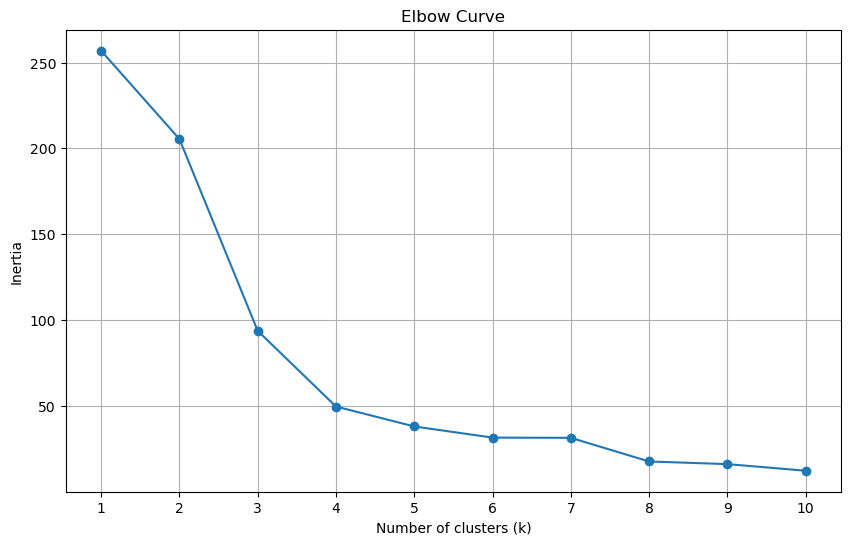

In [102]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.figure ( figsize=(10, 6) )
plt.plot ( pca_inertia_df['k'], pca_inertia_df['inertia'], marker='o' )
plt.xlabel ( 'Number of clusters (k)' )
plt.ylabel ( 'Inertia' )
plt.title ( 'Elbow Curve' )
plt.xticks ( pca_inertia_df['k'] )
plt.grid ( True )
plt.show ()

#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** The best value is `k = 4`. Beyond this point, the decrease in inertia becomes less pronounced.


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** This does not differ from the best `k` value that was found using the original data.

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [103]:
# Initialize the K-Means model using the best value for k
best_pca_k = 4

kmeans_model = KMeans ( n_clusters=best_pca_k, random_state=42 )

In [104]:
# Fit the K-Means model using the PCA data
kmeans_model.fit ( pca_data )

KMeans(n_clusters=4, random_state=42)

In [105]:
# Predict the clusters to group the cryptocurrencies using the PCA data
clusters = kmeans_model.predict ( pca_data )

# Print the resulting array of cluster values.
print ( clusters )

[0 0 2 2 0 0 0 0 0 2 2 2 2 0 2 0 2 2 0 2 2 0 2 2 2 2 2 2 0 2 2 2 3 0 2 2 1
 2 2 2 2]


In [106]:
# Create a copy of the DataFrame with the PCA data
copied_pca_df = pca_df.copy ()

# Add a new column to the DataFrame with the predicted clusters
copied_pca_df['crypto_cluster'] = clusters

# Display sample data
display ( copied_pca_df.head () )

,PCA1,PCA2,PC3A,crypto_cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,0
ethereum,-0.458261,0.458466,0.952877,0
tether,-0.433070,-0.168126,-0.641752,2
ripple,-0.471835,-0.222660,-0.479053,2
bitcoin-cash,-1.157800,2.041209,1.859715,0


<Axes: xlabel='PCA1', ylabel='PCA2'>

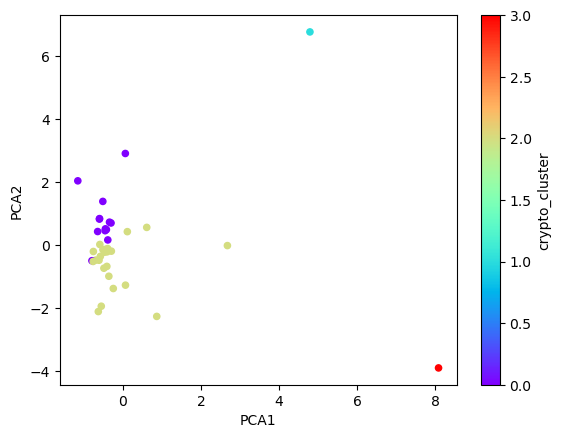

In [107]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`. 
copied_pca_df.plot.scatter (
    x="PCA1",
    y="PCA2",
    c="crypto_cluster",
    colormap="rainbow"
)

### Determine the Weights of Each Feature on each Principal Component

In [119]:
# Use the columns from the original scaled DataFrame as the index.
pca_component_weights = pd.DataFrame ( pca_model.components_.T, columns=['PCA1', 'PCA2', 'PCA3'], index=normalized_df.columns )
pca_component_weights

,PCA1,PCA2,PCA3
price_change_percentage_24h,-0.416728,0.358162,-0.218795
price_change_percentage_7d,-0.102432,0.227432,0.787670
price_change_percentage_14d,-0.009162,0.540415,0.349534
price_change_percentage_30d,0.191523,0.562182,-0.181744
price_change_percentage_60d,0.320365,0.434040,-0.361377
price_change_percentage_200d,0.594468,0.027735,0.039733
price_change_percentage_1y,0.568379,-0.150789,0.210541


#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** For PCA1, Strongest Positive Influence:

price_change_percentage_200d (0.594468)
price_change_percentage_1y (0.568379)
These features have the largest positive loadings, indicating that they contribute the most to PCA1 in a positive direction.

Strongest Negative Influence:

price_change_percentage_24h (-0.416728)
This feature has the largest negative loading, indicating it contributes the most to PCA1 in a negative direction.

For PCA2, Strongest Positive Influence:

price_change_percentage_30d (0.562182)
price_change_percentage_14d (0.540415)
These features have the largest positive loadings, indicating they contribute the most to PCA2 in a positive direction.

Strongest Negative Influence:

price_change_percentage_1y (-0.150789)
This feature has the largest negative loading, but it is relatively small compared to the positive influences, meaning PCA2 is dominated by positive influences.

For PCA3, Strongest Positive Influence:

price_change_percentage_7d (0.787670)
price_change_percentage_1y (0.210541)
price_change_percentage_7d has the largest positive loading, indicating it strongly influences PCA3 in a positive direction.

Strongest Negative Influence:

price_change_percentage_60d (-0.361377)
price_change_percentage_24h (-0.218795)
These features have the most substantial negative influences on PCA3.
    